<h1>Understanding Train Test Split using Scikit-Learn (Python)</h1> 

![](images/TrainTestProcedure.png)

A goal of supervised learning is to build a model that performs well on new data. If you have new data, it’s a good idea to see how your model performs on it. The problem is that you may not have new data, but you can simulate this experience with a procedure like train test split. This tutorial includes:

* What is the Train Test Split Procedure
* Using Train Test Split to Tune Models using Python
* The Bias-variance Tradeoff


<h2>What is the Train Test Split Procedure</h2>

![](images/TrainTestProcedure.png)

train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data. Here is how the procedure works.

0. Make sure your data is arranged into a format acceptable for train test split. In scikit-learn, this consists of separating your full dataset into Features and Target. 
1. Split the dataset into two pieces: a training set and a testing set. This consists of randomly selecting about 75% (you can vary this) of the rows and putting them into your training set and putting the remaining 25% to your test set. Note that the colors in “Features” and “Target” indicate where their data will go (“X_train”, “X_test”, “y_train”, “y_test”) for a particular train test split.
2. Train the model on the training set. This is “X_train” and “y_train” in the image. 
3. Test the model on the testing set (“X_test” and “y_test” in the image) and evaluate the performance. 


<h2>Consequences of NOT using Train Test Split</h2>

You could try not using train test split and <b>train and test the model on the same data</b>. I don’t recommend this approach as it doesn’t simulate how a model would perform on new/unseen data and it tends to reward overly complex models that overfit on the dataset. 

The steps below go over how this inadvisable process works. 


![](images/NotUsingTrainTestSplit.png)

0. Make sure your data is arranged into a format acceptable for train test split. In scikit-learn, this consists of separating your full dataset into Features and Target.
1. Train the model on “Features” and “Target”. 
2. Test the model on “Features” and “Target” and evaluate the performance.

It is important to again emphasize that training on an entire data set and then testing on that same dataset can lead to overfitting. You might find the image below useful in explaining what overfitting is.  The green squiggly line best follows the training data. The problem is that it is likely overfitting on the training data meaning it is likely to perform worse on unseen/new data. [Image contributed by Chabacano to Wikipedia (CC BY-SA 4.0)](https://en.wikipedia.org/wiki/Overfitting#/media/File:Overfitting.svg)(https://creativecommons.org/licenses/by-sa/4.0/). 


![](images/Overfitting.png)

<h2>Using Train Test Split to Tune Models using Python
</h2>


![](images/TrainTestRepeat.png)

This section is about the practical application of train test split to predicting home prices. It goes all the way from importing a dataset to performing a train test split to hyperparameter tuning (change hyperparameters in the image above is also known as hyperparameter tuning) a decision tree regressor to predict home prices and more. 

<h3>Import Libraries</h3>

![](images/PythonLibraries.jpg)

Python has a lot of libraries that can help you accomplish your data science goals (the image above is likely from [Reddit](https://www.reddit.com/r/ProgrammerHumor/comments/6a59fw/import_essay/)) including scikit-learn, pandas, and NumPy which the code below imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

<h3>Load the Dataset
</h3>

Kaggle hosts a dataset which contains the price at which houses were sold for King County, which includes Seattle between May 2014 and May 2015. You can download the dataset from [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction) or load it from my [GitHub](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv). The code below loads the dataset.

In [2]:
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


<h3>Arrange Data into Features and Target</h3>

Scikit-Learn’s train_test_split expects data in the form of features and target. In scikit-learn, a features matrix is a two-dimensional grid of data where rows represent samples and columns represent features. A target is what you want to predict from the data. This tutorial uses ‘price’ as a target. 

In [4]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

![](images/KingCountyArrangeData.png)

<h3>Split Data into Training and Testing Sets (train test split)
</h3>

![](images/KingCountyTrainTestSplit.png)

The colors in the image above indicate which variable (X_train, X_test, y_train, y_test) from the original dataframe df will go to for our particular train test split (random_state = 0). 

In the code below, train_test_split splits the data and returns a list which contains four NumPy arrays. train_size = .75 puts 75% of the data into a training set and the remaining 25% into a testing set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

The image below shows the number of rows and columns the variables contain using the shape attribute before and after the train test split. 75 percent of the rows went to the training set (16209/ 21613 = .75) and 25 percent went to the test set (5404 / 21613 = .25).

![](images/KingCountyShape.png)

<h3>Understanding random_state</h3>

![](images/KingCountyRandomState.png)

The random_state is a pseudo-random number parameter that allows you to reproduce the same exact train test split each time you run the code. The image above shows that if you select a different value for random state, different information would go to X_train, X_test, y_train, and y_test. There are a number of reasons why people use random_state including software testing, tutorials (like this one), and talks. However, it is recommended you remove it if you are trying to see how well a model generalizes to new data.

<h3>Creating and Training a Model with Scikit-learn</h3>

<b>Step 1:</b> Import the model you want to use.

In scikit-learn, all machine learning models are implemented as Python classes.

In [11]:
from sklearn.tree import DecisionTreeRegressor

<b>Step 2:</b> Make an instance of the model

In the code below, I set the hyperparameter max_depth = 2 to preprune my tree to make sure it doesn’t have a depth greater than 2. I should note the next section of the tutorial will go over how to choose an optimal max_depth for your tree.

Also note that in my code below, I made random_state = 0 so that you can get the same results as me.

In [12]:
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

<b>Step 3:</b> Train the model on the data, storing the information learned from the data.

In [13]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

<b>Step 4:</b> Predict labels of unseen (test) data

In [14]:
# You can predict for multiple observations
reg.predict(X_test[0:10])

array([ 406622.58288211, 1095030.54807692,  406622.58288211,
        406622.58288211,  657115.94280443,  406622.58288211,
        406622.58288211,  657115.94280443,  657115.94280443,
       1095030.54807692])

For the multiple predictions above, notice how many times some of the predictions are repeated. If you are wondering why, I encourage you to check out the code below which will start by looking at a single observation/house and then proceed to look at how the model makes its prediction.

In [15]:
X_test.head(1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
17384,2,1.5,1430,1650,3.0


The code below shows how to make a prediction for that single observation.

In [16]:
# You can also predict for 1 observation.
reg.predict(X_test.iloc[0].values.reshape(1,-1))

/Users/michaelgalarnyk/opt/anaconda3/envs/llm-alignment/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([406622.58288211])

The image below shows how the trained model makes a prediction for the one observation.

![](images/HousePredictions.png)

If you are curious how these sorts of diagrams are made, consider checking out my tutorial [Visualizing Decision Trees using Graphviz and Matplotlib](https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc).

<h3>Measuring Model Performance</h3>

![](images/CoefficientDetermination.png)

While there are other ways of measuring model performance (root-mean-square error, mean absolute error, mean absolute error, etc), we are going to keep this simple and use R² otherwise known as the coefficient of determination as our metric. The best possible score is 1.0. A constant model that would always predict the mean value of price would get a R² score of 0.0 (interestingly it is possible to get a negative R² on the test set). The code below uses the trained model’s score method to return the R² of the model that was evaluated on the test set.

In [17]:
score = reg.score(X_test, y_test)
print(score)

0.4380405655348807


You might be wondering if our R² above is good for our model. In general the higher the R², the better the model fits the data. Determining whether a model is performing well can also depend on your field of study. Something harder to predict will in general have a lower R². My argument below is that for housing data, we should have a higher R² based solely on our data.

Here is why. Domain experts generally agree that one of the most important factors in housing prices is location. After all, if you are looking for a home, most likely you care where it is located. As you can see in the trained model below, the decision tree only incorporates sqft_living.


![](images/treeNoCustomarrows.png)

In [18]:
# Visualize Decision Tree using Graphviz
"""
tree.export_graphviz(reg,
                     out_file="images/temp.dot",
                     feature_names = features,
                     filled = True)
"""

# You need to have graphviz installed and added to your path for this 
# to work
#!dot -Tpng -Gdpi=300 images/temp.dot -o images/temp.png

'\ntree.export_graphviz(reg,\n                     out_file="images/temp.dot",\n                     feature_names = features,\n                     filled = True)\n'

In [19]:
# code that generates matplotlib based decision trees. 
"""
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(reg,
              feature_names = features,
              filled = True);
"""

'\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)\ntree.plot_tree(reg,\n              feature_names = features,\n              filled = True);\n'

Even if the model was performing very well, it is unlikely that our model would get buy-in from stakeholders or coworkers as traditionally speaking, there is more to homes than sqft_living.

Note that the original dataset has location information like ‘lat’ and ‘long’. The image below visualizes the price percentile of all the houses in the dataset based on ‘lat’ and ‘long’ (‘lat’ ‘long’ wasn’t included in data which the model trained on). There is definitely a relationship between home price and location.

A way to improve the model would be to make it incorporate location information (‘lat’, ‘long’) as it is likely places like Zillow found a way to incorporate that into their models.

![](images/KingCountyHousingPrices.png)

<h3>Tuning the max_depth of a Tree</h3>

The R² for the model trained earlier in the tutorial was about .438. However, suppose we want to improve the performance so that we can better make predictions on unseen data. While we could definitely add more features like lat long to the model or increase the number of rows in the dataset (find more houses), another way to improve performance is through hyperparameter tuning which involves selecting the optimal values of tuning parameters for a machine learning problem. These tuning parameters are often called hyperparameters. Before doing hyperparameter tuning, we need to take a step back and briefly go over the difference between parameters and hyperparameters. 

<b>Parameters vs hyperparameters</b>

A machine learning algorithm estimates model parameters for a given data set and updates these values as it continues to learn. You can think of a model parameter as a learned value from applying the fitting process. For example, in logistic regression you have model coefficients. In a neural network, you can think of neural network weights as a parameter. Hyperparameters or tuning parameters are meta parameters that influence the fitting process itself. For logistic regression, there are many hyperparameters like regularization strength C. For a neural network, there are many hyperparameters like the number of hidden layers. If all of this sounds confusing, [Jason Brownlee has a good rule of thumb](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) which is “If you have to specify a model parameter manually then it is probably a model hyperparameter.” 

<b> Hyperparameter Tuning </b>

There are a lot of different ways to hyperparameter tune a decision tree for regression. One way is to tune the max_depth hyperparameter. max_depth (hyperparameter) is not the same thing as depth (parameter of a decision tree). max_depth is a way to preprune a decision tree. In other words, if a tree is already as pure as possible at a depth, it will not continue to split. If this isn’t clear, I highly encourage you to check out my Understanding Decision Trees for Classification (Python) tutorial to see the difference between max_depth and depth. 

The code below outputs the accuracy for decision trees with different values for max_depth.


In [20]:
max_depth_range = list(range(1, 25))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth,
                            random_state = 0)
    reg.fit(X_train, y_train)   
    
    score = reg.score(X_test, y_test)
    r2_list.append(score)

The graph below shows that the best model R² is when the hyperparameter max_depth is equal to 5. This process of selecting the best model (max_depth = 5 in this case) among many other candidate models (with different max_depth values in this case) is called model selection. 

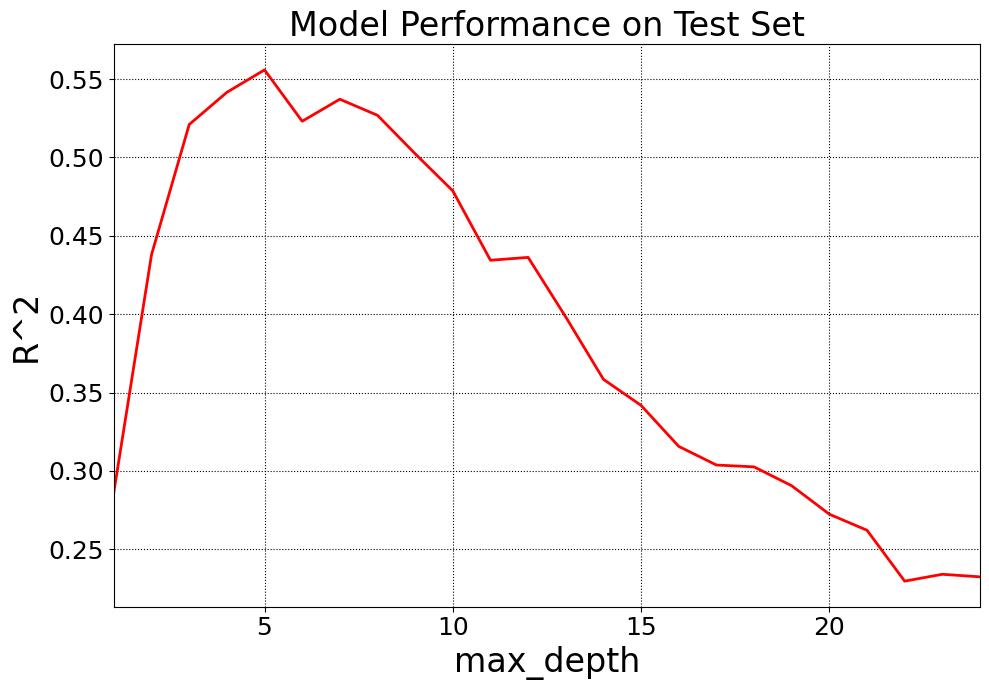

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/Model_Performance.png', dpi = 300)

Note that the model above could have still been overfitted on the test set since the code  changed max_depth repeatedly to achieve the best model. In other words, knowledge of the test set could have leaked into the model as the code iterated through 24 different values for max_depth (the length of max_depth_range is 24). This would lessen the power of our evaluation metric R² as it would no longer be as strong an indicator of generalization performance. This is why in real life, we often have training, test, and validation sets when hyperparameter tuning. 

<h2>The Bias-variance Tradeoff</h2>

In order to understand why max_depth of 5 was the “best model” for our data, take a look at the graph below which shows the model performance when tested on the training and test set. 

In [22]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 25))

# List to store the average RMSE for each value of max_depth:
r2_test_list = []

r2_train_list = []

for depth in max_depth_range:
    
    reg = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0)
    reg.fit(X_train, y_train)    
    
    score = reg.score(X_test, y_test)
    r2_test_list.append(score)
    
    # Bad practice: train and test the model on the same data
    score = reg.score(X_train, y_train)
    r2_train_list.append(score)

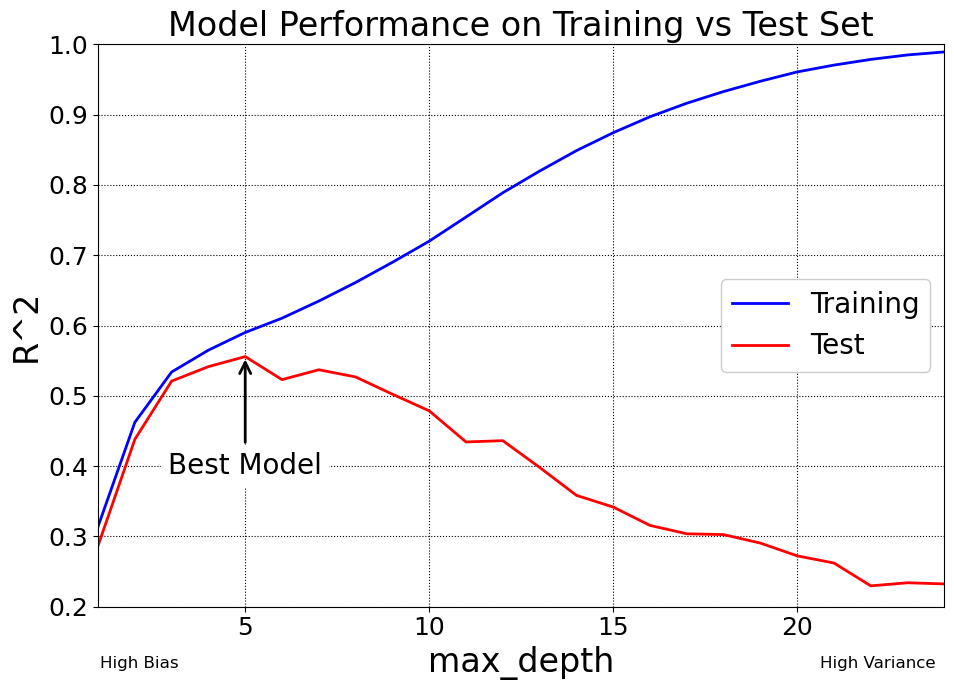

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7), facecolor = 'white');

ax.plot(max_depth_range,
        r2_train_list,
        lw=2,
        color='b',
        label = 'Training')

ax.plot(max_depth_range,
        r2_test_list,
        lw=2,
        color='r',
        label = 'Test')

ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_ylim(.2,1)

ax.legend(loc = 'center right', fontsize = 20, framealpha = 1)
ax.annotate("Best Model",
            xy=(5, 0.5558073822490773), xycoords='data',
            xytext=(5, 0.4), textcoords='data', size = 20,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                            color  = 'black', 
                            lw =  2),
            ha = 'center',
            va = 'center',
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5}
            )

ax.set_title('Model Performance on Training vs Test Set', fontsize = 24)

# Annotating by figure fraction for ease because i want it outside the plotting area. 
ax.annotate('High Bias',
            xy=(.1, .032), xycoords='figure fraction', size = 12)

ax.annotate('High Variance',
            xy=(.82, .032), xycoords='figure fraction', size = 12)

temp = ax.get_xlim()
temp1 = ax.get_ylim()

fig.tight_layout()
#fig.savefig('images/max_depth_vs_R2_Best_Model.png', dpi = 300)

Naturally, the training R² is always better than the test R² for every point on this graph because models make predictions on data they have seen before. 

To the left side of the “Best Model” on the graph (anything less than max_depth = 5), we have models that underfit the data and are considered high bias because they do not not have enough complexity to learn enough about the data. 

To the right side of the “Best Model” on the graph (anything more than max_depth = 5), we have models that overfit the data and are considered high variance because they are overly complex models that perform well on the training data, but perform badly on testing data. 

The “Best Model” is formed by minimizing bias error (bad assumptions in the model) and variance error (oversensitivity to small fluctuations/noise in the training set). 


<h2> Conclusion </h2>

![](images/grid_search_cross_validation.png)

A goal of supervised learning is to build a model that performs well on new data which train test split helps you simulate. With any model validation procedure it is important to keep in mind some advantages and disadvantages which in the case of train test split are: 

Some Advantages: 
* Relatively simple and easier to understand than other methods like K-fold cross validation
* Helps avoid overly complex models that don’t generalize well to new data

Some Disadvantages: 
* Eliminates data that could have been used for training a machine learning model (testing data isn’t used for training) 
* Results can vary for a particular train test split (random_state)
* When hyperparameter tuning, knowledge of the test set can leak into the model (this can be partially solved by using a training, test, and validation set). 

Future tutorials will cover other model validation procedures like K-fold cross validation ([pictured in the image above from the scikit-learn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance)) which help mitigate these issues. It is also important to note that [recent progress in machine learning has challenged the bias variance tradeoff](https://arxiv.org/abs/2109.02355) which is fundamental to the rationale for the train test split process.


![](images/DoubleDescentTestErrors.png)

If you have any questions or thoughts on the tutorial, feel free to reach out on [Twitter](https://twitter.com/GalarnykMichael).